Notebook Outline
- Break apart df into smaller tables with related information
- 

Proposed Outline for Story I'd like to tell
- Exploratory

Ideas
- Predict if thumbnail is a reliable indicator for rating
- Look for ways to help hosts with good ratings host more people
    - How do we check if this is a problem?
        - I'd expect to see x% of hosts with good ratings but who have lower # of visits that other hosts
        - Proxy for # of visits could be # of reviews
    - Better descriptions
    - Better Thumbnails
    - Verification, types of verification
    - Profile pic (quality of pic, if its better do we get more visits?)
    - Location
    - Price
    - Price vs neighborhood?

Insights so far
- Reviews just contains number of reviews for an ID in a time series manner. Doesn't give review content
- Neighborhoods is honestly useless

Install necessary packages

In [1]:
!pip install pandas
!pip insteall sklearn

  Using cached pandas-2.1.0-cp39-cp39-macosx_11_0_arm64.whl (11.3 MB)
  Using cached numpy-1.26.0-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
listings = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/Airbnb_Listings.csv')
neighborhoods = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/neighbourhoods.csv')
reviews = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/reviews.csv')

In [16]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,f,f,moderate,f,t,12,12,0,0,0.08
2,17884,https://www.airbnb.com/rooms/17884,20200530151957,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...",none,"This is a very quiet family neighborhood, but ...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
3,21373,https://www.airbnb.com/rooms/21373,20200530151957,2020-05-30,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,none,This room is in an ultra convenient location i...,...,f,f,moderate,f,f,5,0,5,0,2.17
4,37512,https://www.airbnb.com/rooms/37512,20200530151957,2020-05-31,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,none,Our community is a safe environment and at nig...,...,f,f,moderate,t,t,2,0,2,0,1.53


In [13]:
for col in listings:
    print(col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [17]:
neighborhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Campbell
1,NaN,Cupertino
2,NaN,Gilroy
3,NaN,Los Altos
4,NaN,Los Altos Hills


In [20]:
for col in neighborhoods:
    print(col)
    print(neighborhoods[col].unique())

neighbourhood_group
[nan]
neighbourhood
['Campbell' 'Cupertino' 'Gilroy' 'Los Altos' 'Los Altos Hills' 'Los Gatos'
 'Milpitas' 'Monte Sereno' 'Morgan Hill' 'Mountain View' 'Palo Alto'
 'San Jose' 'Santa Clara' 'Saratoga' 'Sunnyvale' 'Unincorporated Areas']


In [22]:
reviews.head()

,listing_id,date
0,4952,2009-08-02
1,4952,2009-09-04
2,4952,2009-10-16
3,4952,2009-12-10
4,4952,2010-06-08


In [21]:
for col in reviews:
    print(col)
    print(reviews[col].unique())

listing_id
[    4952    11464    17884 ... 43560334 43624287 43652101]
date
['2009-08-02' '2009-09-04' '2009-10-16' ... '2020-04-27' '2020-04-20'
 '2020-05-04']


Lets try to find unexpected outliers - host_id's that have high average review_scores_rating but have low average reviews_per_month
Lets look at review_scores_rating.info() and dist, same for reviews_per_month, to check data cleanliness

Every row has a host_id
Not every listing has ratings. Some have 0. These have null review_scores_ratings and reviews_per_month and will be excluded from analysis for now. 58 rows where review_scores_ratings are Null but there are some ratings. Drop all nulls in these columnslistings

In [25]:
print(len(listings))
listings['host_id'].describe()

7221


count    7.221000e+03
mean     8.886443e+07
std      9.390593e+07
min      7.054000e+03
25%      1.697278e+07
50%      4.800549e+07
75%      1.429331e+08
max      3.477992e+08
Name: host_id, dtype: float64

In [42]:
print(len(listings))
listings['review_scores_rating'].describe()
listings_null_review_rating = listings[listings['review_scores_rating'].isnull()]
print(len(listings_null_review_rating))
listings_null_review_rating_count = listings_null_review_rating[listings_null_review_rating['reviews_per_month'].notnull()]
print(len(listings_null_review_rating_count))
listings_null_review_rating_count.head()

7221
1367
58


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
156,1679292,https://www.airbnb.com/rooms/1679292,20200530151957,2020-05-31,Furnished Master Bdrm. with Private Bath,"Nice, clean, new townhouse conveniently locate...",Huge bathtub. 2 sinks. New. All Furnished. Ful...,"Nice, clean, new townhouse conveniently locate...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,4,1,3,0,0.01
426,5008287,https://www.airbnb.com/rooms/5008287,20200530151957,2020-05-30,Private Room and Private Bath Room,Hi My name is Rachel. I'm a Chinese girl doing...,I'm a very friendly and outgoing person. I lov...,Hi My name is Rachel. I'm a Chinese girl doing...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.03
1111,10748105,https://www.airbnb.com/rooms/10748105,20200530151957,2020-05-31,Modern Room and private bath in large home!,"Our home is close to ""The Plant"" - Restaurants...",One private bedroom with cable TV and free Wif...,"Our home is close to ""The Plant"" - Restaurants...",none,"quiet neighborhood very close to golf course, ...",...,t,f,moderate,f,f,1,0,1,0,0.05
1132,10788777,https://www.airbnb.com/rooms/10788777,20200530151957,2020-05-31,Great apartment with swim pool,Here have clean room and quite place会讲中文,会讲中文,Here have clean room and quite place会讲中文 会讲中文,none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.02
1703,15393351,https://www.airbnb.com/rooms/15393351,20200530151957,2020-05-31,Heart of Silicon Valley Relaxing space near Le...,My place is close to Levi Stadium in the heart...,The room is large with a queen bed for your co...,My place is close to Levi Stadium in the heart...,none,Safe and quite,...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,0.15


In [43]:
print(len(listings))
listings['reviews_per_month'].describe()
listings_null_review_count = listings[listings['reviews_per_month'].isnull()]
print(len(listings_null_review_count))
listings_null_review_rating_count = listings_null_review_rating[listings_null_review_rating['review_scores_rating'].notnull()]
print(len(listings_null_review_rating_count))
listings_null_review_rating_count.head()

7221
1309
0


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [58]:
listings_cleaned_ratings_reviews = listings[listings['reviews_per_month'].notnull()]
listings_cleaned_ratings_reviews = listings_cleaned_ratings_reviews[listings_cleaned_ratings_reviews['review_scores_rating'].notnull()]
listings_cleaned_ratings_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5854 entries, 0 to 7203
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 4.8+ MB


In [59]:
listings_cleaned_ratings_reviews = listings_cleaned_ratings_reviews.groupby('host_id').agg({'reviews_per_month': 'sum', 'review_scores_rating': 'mean'})

In [62]:
listings_cleaned_ratings_reviews.describe()
# normalize each column in the DataFrame using scikit-learn
scaler = StandardScaler()
for col in listings_cleaned_ratings_reviews.columns:
    listings_cleaned_ratings_reviews[col] = scaler.fit_transform(listings_cleaned_ratings_reviews[[col]])
listings_cleaned_ratings_reviews.describe()

,reviews_per_month,review_scores_rating
count,2.902000e+03,2.902000e+03
mean,-7.345376e-18,-2.448459e-18
std,1.000172e+00,1.000172e+00
min,-5.065173e-01,-1.162317e+01
25%,-4.255199e-01,-1.613800e-01
50%,-2.736498e-01,2.970915e-01
75%,6.552683e-02,6.027392e-01
max,2.542738e+01,6.027392e-01


/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='review_scores_rating', ylabel='reviews_per_month'>

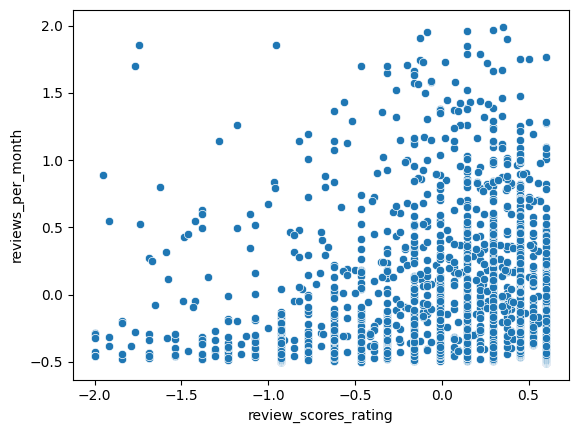

In [72]:
minimized_data = listings_cleaned_ratings_reviews[listings_cleaned_ratings_reviews['review_scores_rating'] > -2]
minimized_data = minimized_data[minimized_data['review_scores_rating'] < 2]
minimized_data = minimized_data[minimized_data['reviews_per_month'] < 2]
minimized_data = minimized_data[minimized_data['reviews_per_month'] > -2]

sns.scatterplot(x='review_scores_rating', y='reviews_per_month', data=minimized_data)